# SUMMARY
## Source: Newscatcher API
### Good:
* Good amount of data returned from queries
* Good options for filtering and customising queries
* Can search for keywords in titles, summaries and articles, allowing for filtering to human trafficking articles
* Gives link to jpeg image associated with article - would be good for displaying alongside article in dashboard
* Provides a rank for each news source, and score for how relevant to your query it is. Will be useful for filtering incoming data.
* Can exclude "opinion" articles.

### Bad:
* Most expensive membership fee
* Can only query for 2 weeks in the past with free membership. 3 years with £440 p/m membership.
* Doesn't give full article, just title and summary. Will require webscraping to get full article.
* "Country" field returned isn't accurate to the location the article is written about (e.g. bbc-news/us-and-canada articles classified as country=GB). It is the country of the publisher.

In [94]:
import requests
from newscatcherapi import NewsCatcherApiClient
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [64]:
API_key = "Weon7Lunb4QqlJDQDH_vUoTSUMqQS7JhDXz99sUHlMM"
newscatcherapi = NewsCatcherApiClient(x_api_key=API_key)

## Search fields:

* <b> q* </b> - Keyword/keywords you're searching for. This is the most important part of your query.
* <b> lang </b> - Specifies the languages of the search. For example, en.
* <b> not_lang </b> - Inverse to the lang parameter
* <b> published_date_precision </b> - There are 3 types of date precision we define: 
* <b> search_in </b> - limit search to title, summary or full article
* <b> countries </b> - Countries where the news publisher is located.
* <b> not_countries </b> - The inverse of the countries parameter.
* <b> topic </b> - news, sport, tech, world, finance, politics, business, economics, entertainment, beauty, travel, music, food, science, gaming, energy.
* <b> sources </b> - One or more news resources to filter your search. It should be the normal form of the URL,
* <b> not_sources </b> - One or more sources to be excluded from the search. 
* <b> ranked_only </b> -  Default: True. Limit the search only for the sources which are in the top 1 million online websites.
* <b> from_rank </b> - The lowest boundary of the rank of a news website to filter by. 
* <b> to_rank </b> - The upper boundary of the rank of a news website to filter by.
* <b> sort_by </b> - relevancy (default value) — the most relevant results first 
* <b> date </b> — the most recently published results first 
* <b> rank </b> — the results from the highest-ranked sources first
* <b> page_size </b> - How many articles to return per page.
* <b> page </b> - The number of the page. Use it to scroll through the results. 
* <b> to </b> - YYYY/mm/dd Until which point in time to search for.
* <b> from </b> - YYYY/mm/dd From which point in time to start the search.

## Returns fields:

* <b> title </b> - The title of the article
* <b> author </b> - The author of the article
* <b> published_date </b> - Published date & time
* <b> published_date_precision </b> - Accuracy of the published_date field.
  * There are 3 types of date precision we define:
    * <b> full </b> — day and time of an article is correctly identified with the appropriate timezone
    * <b> timezone unknown </b> — day and time of an article is correctly identified without timezone
    * <b> date </b> — only the day is identified without an exact time
* <b> link </b> - Full URL where the article was originally published
* <b> clean_url </b> - The URL of the article's source
* <b> excerpt </b> - Short summary of the article provided by the publisher
* <b> summary </b> - The full content of the article
* <b> rights </b> - Copyright​
* <b> rank </b> - The page rank of the source website (which is given in the clean_url)
* <b> topic </b> - The main topic of the news publisher. Important: This parameter is not deducted on a per-article level: it is deducted on the per-publisher level
* <b> country </b> - The country of the publisher
* <b> language </b> - The language of the article
* <b> authors </b> - A list of article authors​
* <b> media </b> - A link to a thumbnail image of the article
* <b> is_opinion </b> - True if the article is an "Opinion" article
* <b> twitter_account </b> - The Twitter account of the publisher
* <b> _score </b> - How well the article is matching your search criteria. _score is different for each search you make. The best matching article has the highest score
* <b> _id </b> - Newscatcher API's unique identifier for each news article

## Default query - search for articles mentioning "Apple"

In [39]:
all_articles = newscatcherapi.get_search(q='Apple',
                                         lang='en',
                                         #countries='UK',
                                         page_size=100)

In [40]:
print(f"Found {len(all_articles['articles'])} articles")

Found 100 articles


In [41]:
all_articles['articles'][0]

{'title': "Apple One: What you need to know about Apple's services bundle",
 'author': 'Roman Loyola',
 'published_date': '2022-10-24 11:00:00',
 'published_date_precision': 'full',
 'link': 'https://www.macworld.com/article/234604/apple-one-faq.html',
 'clean_url': 'macworld.com',
 'excerpt': 'Learn all about Apple One: Pricing, included services, family sharing, and more.',
 'summary': "Apple has several subscription services available, and now you can save some cash by signing up for Apple One, a pricing plan that bundles Apple's services together for discounts. In effect, it replaces expensive a la carte pricing with cheaper pricing bundles.\n\nHere's what you need to know about Apple One.\n\nWhat services are available in Apple One?\n\nAll of Apple's services are available for bundled pricing: Apple Arcade, Apple Fitness+, Apple Music, Apple News+, Apple TV+, and iCloud.\n\nIf Apple introduces new services, they'll probably adjust the Apple One plans accordingly.",
 'rights': 'mac

## NEWS WEBSITES WHICH ARE BEING SCRAPED

In [42]:
source_counts = pd.Series([article["clean_url"] for article in all_articles["articles"]]).value_counts()
source_counts.keys()

Index(['iheart.com', 'yahoo.com', 'bgr.com', 'appleinsider.com', '9to5mac.com',
       'cnet.com', 'macworld.com', 'screenrant.com', 'sfgate.com',
       'marketwatch.com', 'hollywoodreporter.com', 'etonline.com',
       'streetinsider.com', 'usatoday.com', 'dailymail.co.uk', 'citynews.ca',
       'makeuseof.com', 'wsj.com', 'digitaltrends.com', 'chron.com', 'msn.com',
       'techspot.com', 'the-sun.com', 'nzherald.co.nz', 'seekingalpha.com',
       'standard.co.uk', 'whathifi.com', 'tvline.com', 'businesstoday.in',
       'financialpost.com', 'bizjournals.com', 'marketscreener.com',
       'indiewire.com', 'creativebloq.com', 'cultofmac.com', 'malaymail.com',
       'morningstar.com', 'bnnbloomberg.ca', 'torontosun.com', 'techtimes.com',
       'vulture.com', 'cbsnews.com', 'macrumors.com', 'financialexpress.com',
       'cnbc.com', 'deseret.com', 'trustedreviews.com', 'techcrunch.com',
       'variety.com', 'zdnet.com', 'prnewswire.com', 'gsmarena.com',
       'livemint.com', 'techr

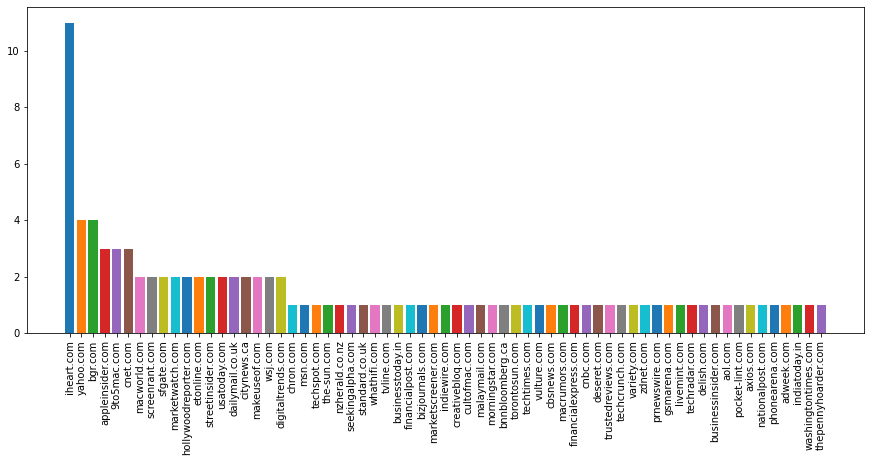

In [43]:
source_counts
plt.figure(figsize=(15,6))
for i, (name, counts) in enumerate(source_counts.items()):
    plt.bar(i, counts)
plt.xticks(range(i+1), source_counts.keys(), rotation=90)
plt.show()

In [54]:
#country_filters = [
#    "ae", "ar", "at", "au", "be", "bg", "br", "ca", "ch", "cn", "co", "cu", "cz", "de", "eg", "fr", 
#    "gb", "gr", "hk", "hu", "id", "ie", "il", "in", "it", "jp", "kr", "lt", "lv", "ma", "mx", "my", 
#    "ng", "nl", "no", "nz", "ph", "pl", "pt", "ro", "rs", "ru", "sa", "se", "sg", "si", "sk", "th", 
#    "tr", "tw", "ua", "us", "ve", "za",
#]

## Country sources for articles are quite imbalanced

In [65]:
country_filters = [
    "US", "UK", "AU", "CH", "RU"
]

In [78]:
country="GB"
sources = newscatcherapi.get_sources(lang='en', countries=country.upper())
print(f"{country}: found {len(sources['sources'])} sources")
sources_per_country[country] = len(sources["sources"])
time.sleep(1)

GB: found 1000 sources


In [66]:
sources_per_country = {}

for country in country_filters:
    sources = newscatcherapi.get_sources(lang='en', countries=country.upper())
    print(f"{country}: found {len(sources['sources'])} sources")
    sources_per_country[country] = len(sources["sources"])
    time.sleep(1)

US: found 1000 sources
UK: found 2 sources
AU: found 483 sources
CH: found 30 sources
RU: found 25 sources


## Free plan only gives 2 weeks of data. Paid plan gives up to 3 years

In [47]:
all_articles = newscatcherapi.get_search(q='Apple',
                                         lang='en',
                                         #countries='UK',
                                         page_size=100,
                                         from_="2022/10/17",
                                         to_="2022/10/31")

In [49]:
print(f"Found {len(all_articles['articles'])} articles")

Found 100 articles


## Search for articles linked to human trafficking

In [67]:
keywords = [
    "human trafficking", "modern slavery", "sexual exploitation", "trafficking", "domestic servitude",
    "forced labour", "debt bondage", "forced begging", "forced marriage", "organ removal"
]

query = ' OR '.join(keywords)

In [68]:
query

'human trafficking OR modern slavery OR sexual exploitation OR trafficking OR domestic servitude OR forced labour OR debt bondage OR forced begging OR forced marriage OR organ removal'

In [69]:
trafficking_articles = newscatcherapi.get_search(
    q=query,
    lang='en',
    #countries='UK',
    page_size=100
)

In [80]:
for article in trafficking_articles["articles"]:
    if article["is_opinion"]==False:
        print("=======================================================")
        print()
        print(article["title"])
        print(article["link"])
        print(article["published_date"])
        print(f'Country: {article["country"]}')
        print(f'Article rank: {article["rank"]}')
        print()
        print(article["summary"])
        print()


Laws, protocols and trafficking
https://www.thenews.com.pk/print/1004566-laws-protocols-and-trafficking
2022-10-29 01:00:00
Country: PK
Article rank: 4578

Every country in the world is affected by human trafficking either as a point of origin, transit or destination, and Pakistan is not an exception. The UNODC describes human trafficking as 'one of the world's most shameful crimes'' which robs people of their freedom.
People of all ages and from all backgrounds can become victims of this crime. However, women and children and the vulnerable, such as the poor, migrants, and stateless persons are more susceptible to being trafficked. Human trafficking can take various shapes but it can generally be described as taking three main forms: forced labour (including sex trafficking), forced marriage, and forced organ removal.


Report: Human Trafficking Victims in the Netherlands Becoming Less Visible
https://www.occrp.org/en/daily/16941-netherlands-human-trafficking-victims-decrease-while-d

### Notes from reading articles

* query tends to find relevant articles
* "country" not always accurate to the country of the article (e.g. https://www.bbc.com/news/world-us-canada is labelled as GB)
* some overlap of the same articles between different news sources

# Use BERT to group together the articles with similar titles

In [112]:
from sentence_transformers import SentenceTransformer

titles = np.array([article["title"] for article in trafficking_articles["articles"][:100]])
embeddings = model.encode(titles)
distances = cosine_similarity(embeddings, embeddings)

already_linked = []

for i, (title, distances) in enumerate(zip(titles, distances)):
    if i not in already_linked:
        print("============================================================================")
        print()
        print("Title: ")
        print(title)
        print()
        print("Similar titles: ")
        similar_titles = titles[distances >= 0.75]
        for other_title in similar_titles:
            print(other_title)
        
        for i in np.where(distances >= 0.75)[0]:
            already_linked.append(i)
        
        print()


Title: 
Laws, protocols and trafficking

Similar titles: 
Laws, protocols and trafficking


Title: 
Report: Human Trafficking Victims in the Netherlands Becoming Less Visible

Similar titles: 
Report: Human Trafficking Victims in the Netherlands Becoming Less Visible


Title: 
Trafficked: Binjun Xie human trafficking ring: How Australia's immigration holes allowed a modern-day sex slavery operation to thrive

Similar titles: 
Trafficked: Binjun Xie human trafficking ring: How Australia's immigration holes allowed a modern-day sex slavery operation to thrive


Title: 
US midterm elections: Why five states have slavery on the ballot in 2022

Similar titles: 
US midterm elections: Why five states have slavery on the ballot in 2022
Why five states have slavery on the ballot in 2022
US midterm elections: Why five states have slavery on the ballot in 2022
US midterm elections: Why five states have slavery on the ballot in 2022
US midterm elections: Why five states have slavery on the ballot